In [5]:
## imports
import pandas as pd
import numpy as np

## import the plotnine package
## make sure it's installed
## if not installed, can use
## ! pip install plotnine
import plotnine
from plotnine import *

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# A few plot types

## Load DC crime data

In [6]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()


,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,...,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-76.924471,38.898354,20056760,2020/04/09 07:08:15+00,MIDNIGHT,OTHERS,ROBBERY,5200 - 5355 BLOCK OF NANNIE HELEN BURROUGHS AV...,406552.00,136724.48,...,007807 2,7807.0,Precinct 95,38.898347,-76.924469,NaN,2020/04/09 05:40:24+00,2020/04/09 05:45:26+00,271816598,NaN
1,-76.929235,38.894595,20056788,2020/04/09 11:02:37+00,DAY,GUN,ASSAULT W/DANGEROUS WEAPON,300 - 409 BLOCK OF 50TH STREET NE,406139.09,136306.78,...,007804 2,7804.0,Precinct 97,38.894587,-76.929233,NaN,2020/04/09 07:32:54+00,NaN,271816599,NaN
2,-76.976256,38.852207,20056798,2020/04/09 11:03:42+00,DAY,OTHERS,THEFT F/AUTO,3100 - 3149 BLOCK OF 20TH STREET SE,402061.19,131599.32,...,007404 1,7404.0,Precinct 117,38.852199,-76.976254,NaN,2020/04/09 10:02:57+00,2020/04/09 11:03:53+00,271816600,NaN
3,-77.022449,38.967618,20056802,2020/04/09 13:08:23+00,DAY,OTHERS,THEFT F/AUTO,6400 - 6415 BLOCK OF 7TH STREET NW,398054.77,144410.86,...,001901 4,1901.0,Precinct 59,38.967610,-77.022446,NaN,2020/03/15 21:00:39+00,2020/03/15 22:00:52+00,271816601,NaN
4,-77.016919,38.902528,20056806,2020/04/09 12:48:47+00,DAY,OTHERS,THEFT F/AUTO,400 - 443 BLOCK OF K STREET NW,398532.62,137185.18,...,004702 3,4702.0,Precinct 1,38.902520,-77.016917,MOUNT VERNON TRIANGLE CID,2020/04/08 19:00:20+00,2020/04/08 19:30:29+00,271816602,NaN


## Plot type one: bar plot

**Goal**: bar plot where x axis is what shift it is; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator)

In [7]:
## step one: create the summary we want to plot
count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OBJECTID'].nunique()).reset_index()
count_byshift


,SHIFT,OBJECTID
0,DAY,10091
1,EVENING,12312
2,MIDNIGHT,5509


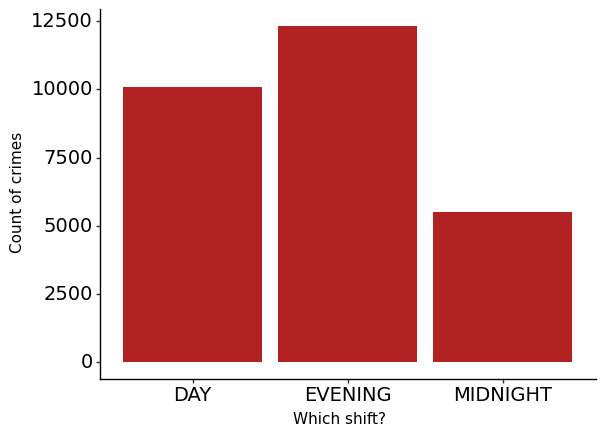

<ggplot: (402567940)>

In [8]:

## one way: plot and display in notebook
(ggplot(count_byshift, aes(x = 'SHIFT', 
    y = 'OBJECTID')) + # base layer with data and x and y axis 
    geom_bar(stat = "identity", fill = "firebrick") + # telling it to expect a bar chart; identity
    # arg just means to use the y value 
    theme_classic() + # aesthetics
    xlab("Which shift?") + # custom label for x axis
    ylab("Count of crimes") + # custom label for y axis
    theme(axis_text = element_text(size = 14, color = "black"))) # make font bigger


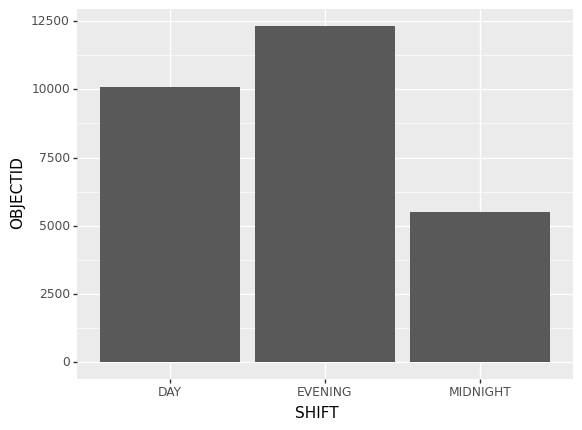

<ggplot: (694319381)>

In [9]:

## another way: save to png- right now,
## it's writing to same path our df is stored in; 
plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)


## what happens if we don't specify theme or color of bars? diff aesthetics
## also doesnt give us informative x and y labels (for pset please give 
## informative labels)
(ggplot(count_byshift, aes(x = 'SHIFT', 
            y = 'OBJECTID')) +
            geom_bar(stat = "identity"))

## Plot type two: line graph

**Goal**: bar plot where x axis is month; y axis is the count of unique crime reports (using `OBJECT_ID` as unique indicator); want line graph to be able to see trends over time in count of reported crimes

In [10]:
## group by month and find unique reports
### first, extract month from report_dat (just 
### with the noncleaned version)

dc_crim_2020['report_month'] = pd.to_datetime(dc_crim_2020.REPORT_DAT,
                                             errors = "coerce").dt.month
### double check this worked
dc_crim_2020[["REPORT_DAT", "report_month"]].sample(n = 3)

### then, group by month and find unique reports; same syntax as above
### just a diff grouping variable 
count_bymonth = pd.DataFrame(dc_crim_2020.groupby('report_month')['OBJECTID'].nunique()).reset_index()
count_bymonth


,REPORT_DAT,report_month
21414,2020/05/04 14:23:59+00,5
11128,2020/01/06 05:54:37+00,1
5214,2020/08/22 20:34:25+00,8


,report_month,OBJECTID
0,1,2948
1,2,2536
2,3,2200
3,4,1652
4,5,1832
5,6,2275
6,7,2133
7,8,2432
8,9,2571
9,10,2559


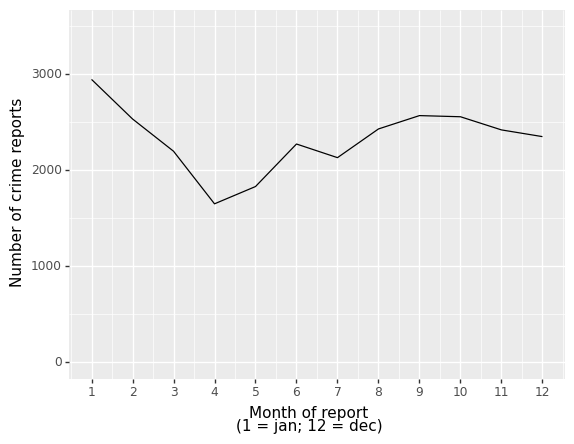

<ggplot: (694338119)>

In [11]:

### finally, plot result as line graph
### nearly identical syntax to above
### but uses month as the xaxis rather than
### police shift and geom_line()
### rather than geom_bar()

(ggplot(count_bymonth, aes(x = 'report_month', 
            y = 'OBJECTID')) + # base layer with x and y variables
            geom_line() + # plotting a line
            ylim(0, 3500) + # customizing axis limits (preferred to start at 0)
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)))

## Making more complex: visualizing by group

What if we want to create the above line graph but visualize separately for each ward?

Can group by two variables and use the facet_wrap command

### Prelim step: get the input data ready

In [12]:
### add ward as grouping var
count_bymonth_byw = pd.DataFrame(dc_crim_2020.groupby(['report_month',
                        'WARD'])['OBJECTID'].nunique()).reset_index()
count_bymonth_byw.head()
count_bymonth_byw.tail()

## make the facetting var prettier 
## by noting "Ward" before the
count_bymonth_byw['WARD_name'] = 'Ward: ' + count_bymonth_byw.WARD.astype(str)

,report_month,WARD,OBJECTID
0,1,1,369
1,1,2,654
2,1,3,222
3,1,4,313
4,1,5,456


,report_month,WARD,OBJECTID
91,12,4,253
92,12,5,380
93,12,6,305
94,12,7,343
95,12,8,278


### Approach one: separate facet for each group

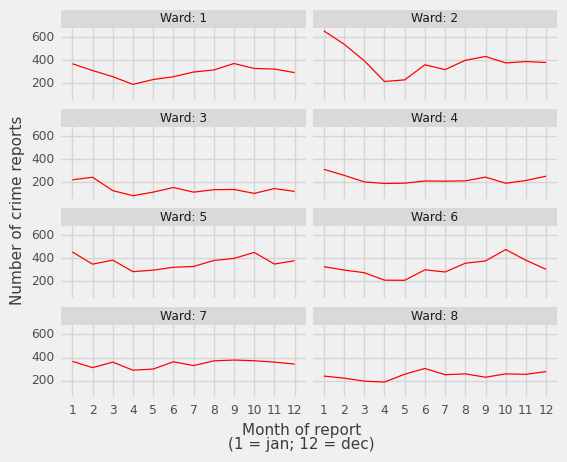

<ggplot: (694398796)>

In [13]:
### same syntax as above graph but adding the facet_wrap
### to create a separate subplot for each ward
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID')) +
            geom_line(color = "red") +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            facet_wrap('WARD_name', ncol = 2) + # ADDITIONAL LINE 
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() # using 538 theme 
            ) 

### Approach two: use the group and color commands to get separate shading by group

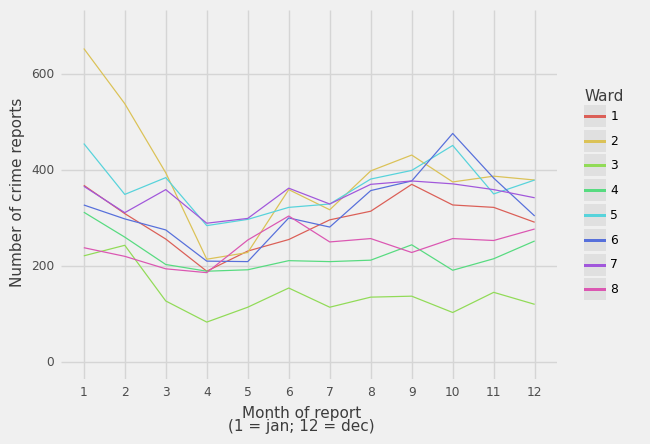

<ggplot: (694163655)>

In [14]:
### instead of facet_wrap, one graph but diff colors
(ggplot(count_bymonth_byw, aes(x = 'report_month', 
            y = 'OBJECTID', group = 'factor(WARD)', color = 'factor(WARD)')) +
            geom_line() +
            xlab("Month of report\n(1 = jan; 12 = dec)") +
            ylab("Number of crime reports") +
            scale_x_continuous(breaks = np.arange(1, 13)) +
            theme_538() + 
             labs(color = "Ward") +
             ylim(0, 700)
            ) 